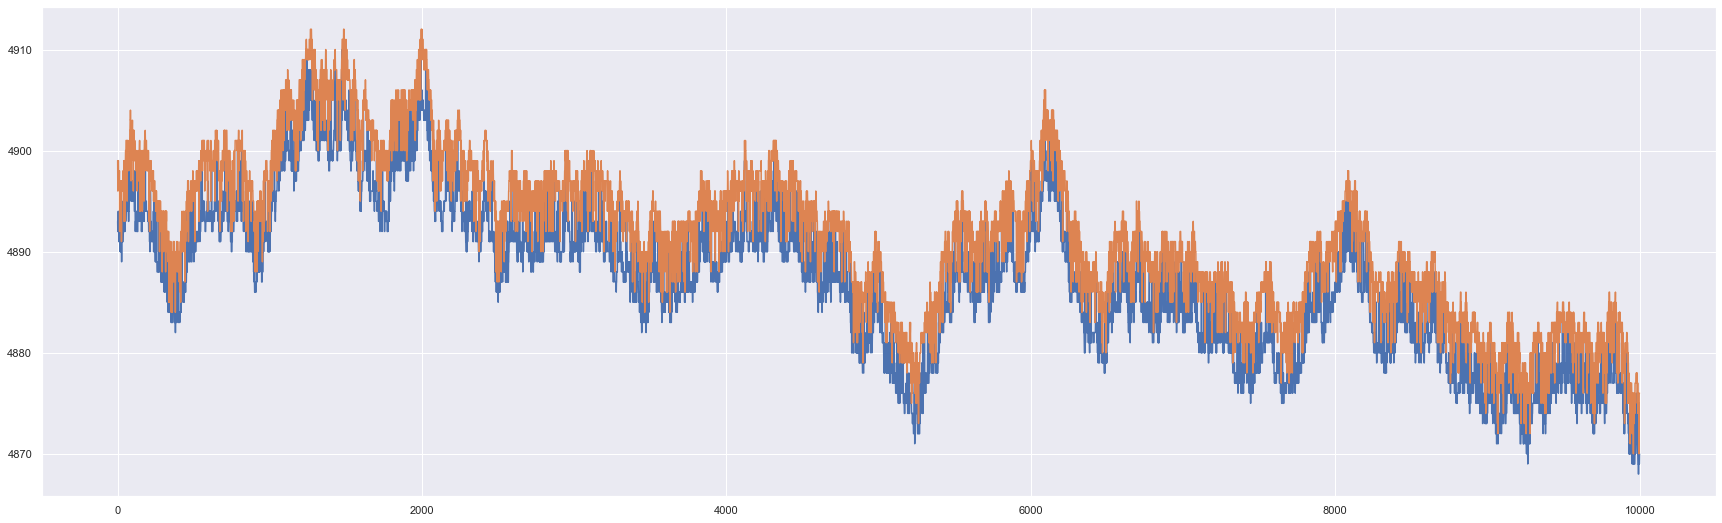

In [269]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
day = 0
path = f"island-data-bottle-round-2/prices_round_2_day_{day}.csv"
path_nn = f"island-data-bottle-round-2/trades_round_2_day_{day}_nn.csv"
df = pd.read_csv(path, sep=';')
df_nn = pd.read_csv(path_nn, sep=';')

bananas = df[df['product']=="BANANAS"].reset_index(drop=True)
coconut = df[df['product'] == "COCONUTS"].reset_index(drop=True)
pina_coladas = df[df['product'] == "PINA_COLADAS"].reset_index(drop=True)


pearls = df[df['product']=='PEARLS'].reset_index(drop=True)

bananas_market = df_nn[df_nn['symbol'] == "BANANAS"].reset_index(
    drop=True).fillna(0)
coconut_market = df_nn[df_nn['symbol'] == "COCONUTS"].reset_index(drop=True).fillna(0)
pina_coladas_market = df_nn[df_nn['symbol'] ==
                            "PINA_COLADAS"].reset_index(drop=True).fillna(0)

"""
for idx, price in enumerate(bananas['mid_price']):
    if idx == len(bananas['mid_price'][4000:6000])-1: break

    if bananas['bid_volume'][idx]-bananas['ask_volume'][idx] > 0:
        ax.plot([idx, idx+1], bananas['mid_price'][idx:idx+2], c='r')
    elif bananas['bid_volume'][idx]-bananas['ask_volume'][idx] == 0:
        ax.plot([idx, idx+1], bananas['mid_price'][idx:idx+2], c='b')
    else:
        ax.plot([idx, idx+1], bananas['mid_price'][idx:idx+2], c='g')
"""

plt.plot(bananas['bid_price_1'])
plt.plot(bananas['ask_price_1'])
plt.show()



In [41]:
bananas['best_ask'] = bananas[['ask_price_1','ask_price_2','ask_price_3']].min(axis=1)
bananas['best_bid'] = bananas[['bid_price_1','bid_price_2','bid_price_3']].max(axis=1)
bananas['spread'] = bananas['best_ask'] - bananas['best_bid']
avg = bananas['spread'].mean()
bananas[bananas['spread']>avg]


,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,...,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss,bid_volume,ask_volume,best_ask,best_bid,spread
0,-2,0,BANANAS,4997,26,NaN,NaN,NaN,NaN,5003,...,NaN,NaN,NaN,5000.0,0.000000,NaN,NaN,5003.0,4997.0,6.0
2,-2,200,BANANAS,4997,31,NaN,NaN,NaN,NaN,5004,...,NaN,NaN,NaN,5000.5,2.536621,NaN,NaN,5004.0,4997.0,7.0
3,-2,300,BANANAS,4997,27,NaN,NaN,NaN,NaN,5004,...,NaN,NaN,NaN,5000.5,2.405762,NaN,NaN,5004.0,4997.0,7.0
6,-2,600,BANANAS,4997,30,NaN,NaN,NaN,NaN,5004,...,NaN,NaN,NaN,5000.5,2.388672,NaN,NaN,5004.0,4997.0,7.0
7,-2,700,BANANAS,4998,5,4997.0,28.0,NaN,NaN,5004,...,NaN,NaN,NaN,5001.0,2.603516,NaN,NaN,5004.0,4998.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9991,-2,999100,BANANAS,4945,28,NaN,NaN,NaN,NaN,4951,...,27.0,NaN,NaN,4948.0,219212.000000,NaN,NaN,4951.0,4945.0,6.0
9995,-2,999500,BANANAS,4944,26,NaN,NaN,NaN,NaN,4951,...,NaN,NaN,NaN,4947.5,223680.000000,NaN,NaN,4951.0,4944.0,7.0
9996,-2,999600,BANANAS,4946,6,4945.0,30.0,NaN,NaN,4952,...,NaN,NaN,NaN,4949.0,219260.000000,NaN,NaN,4952.0,4946.0,6.0
9997,-2,999700,BANANAS,4945,22,NaN,NaN,NaN,NaN,4952,...,NaN,NaN,NaN,4948.5,214296.000000,NaN,NaN,4952.0,4945.0,7.0


In [46]:
pearls['best_ask'] = pearls[['ask_price_1',
                               'ask_price_2', 'ask_price_3']].min(axis=1)
pearls['best_bid'] = pearls[['bid_price_1',
                               'bid_price_2', 'bid_price_3']].max(axis=1)
pearls['spread'] = pearls['best_ask'] - pearls['best_bid']
avg = pearls['spread'].mean()
avg
# pearls[pearls['spread'] > avg]


6.7288

6.997646868043019

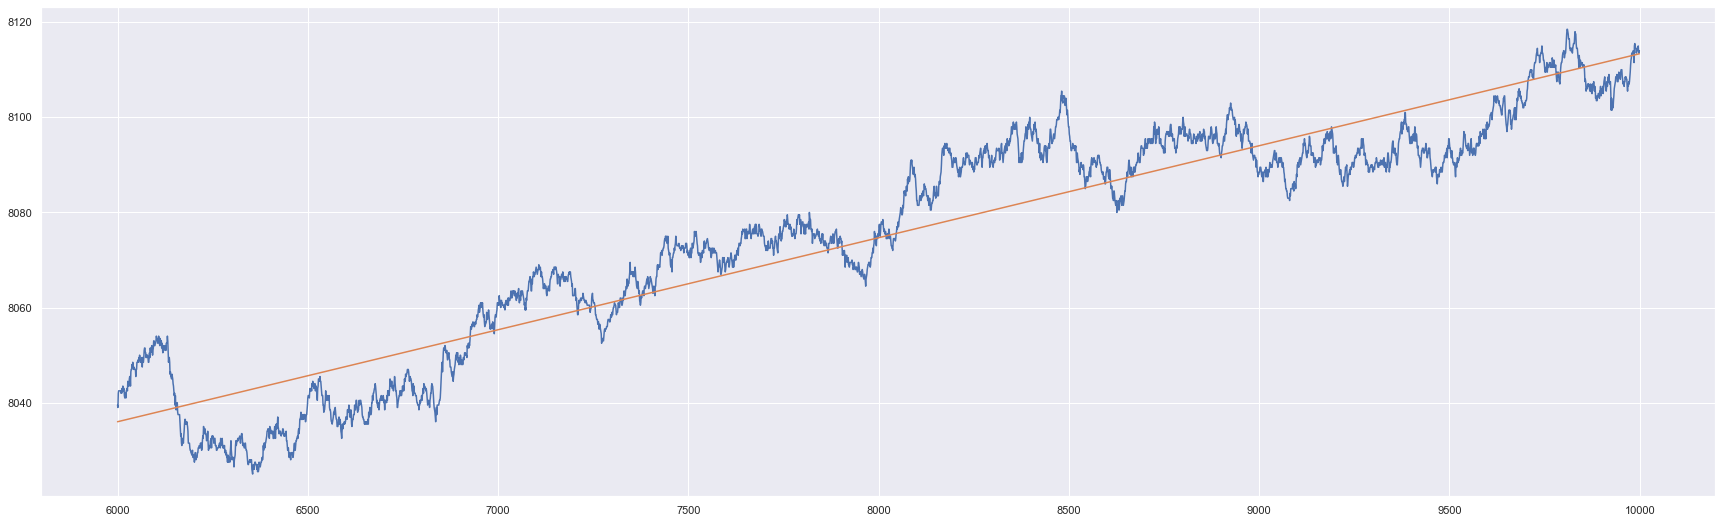

In [102]:
# bananas['mid_price']
y = coconut['mid_price'][6000:10000]
x = range(6000,10000)
m, b = np.polyfit(x, y, 1)
plt.plot(x,y)
plt.plot(x, m*x+b)

abs(y-(m*x+b)).mean()
# plt.plot(coconut['mid_price'])


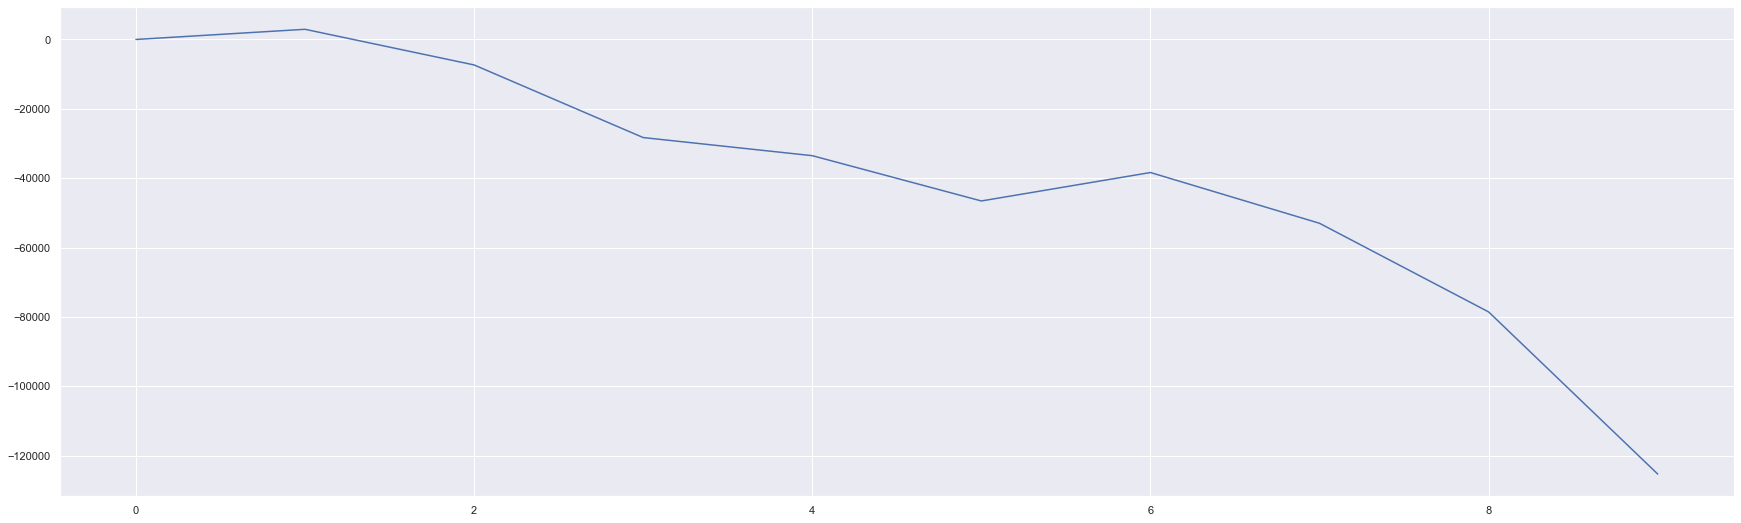

In [282]:

import seaborn as sns

coef = []
for delta_t in range(0,10000,1000):
    x = []
    y = []
    for i in coconut['timestamp']:
        if i+delta_t in coconut['timestamp'].to_numpy():
            if i-delta_t in pina_coladas['timestamp'].to_numpy() :
                y.append(pina_coladas[pina_coladas['timestamp'] == i]['mid_price'].values[0] -
                        pina_coladas[pina_coladas['timestamp'] == i-delta_t]['mid_price'].values[0])
                x.append(coconut[coconut['timestamp'] == i+delta_t]['mid_price'].values[0] -
                        coconut[coconut['timestamp'] == i]['mid_price'].values[0])
    coef.append(np.correlate(x,y))
plt.plot(coef)


In [257]:
pina_coladas[pina_coladas['timestamp']==100]

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
1,-1,100,PINA_COLADAS,14999,31,14998.0,64.0,NaN,NaN,15001,31,15002.0,64.0,NaN,NaN,15000.0,0.0


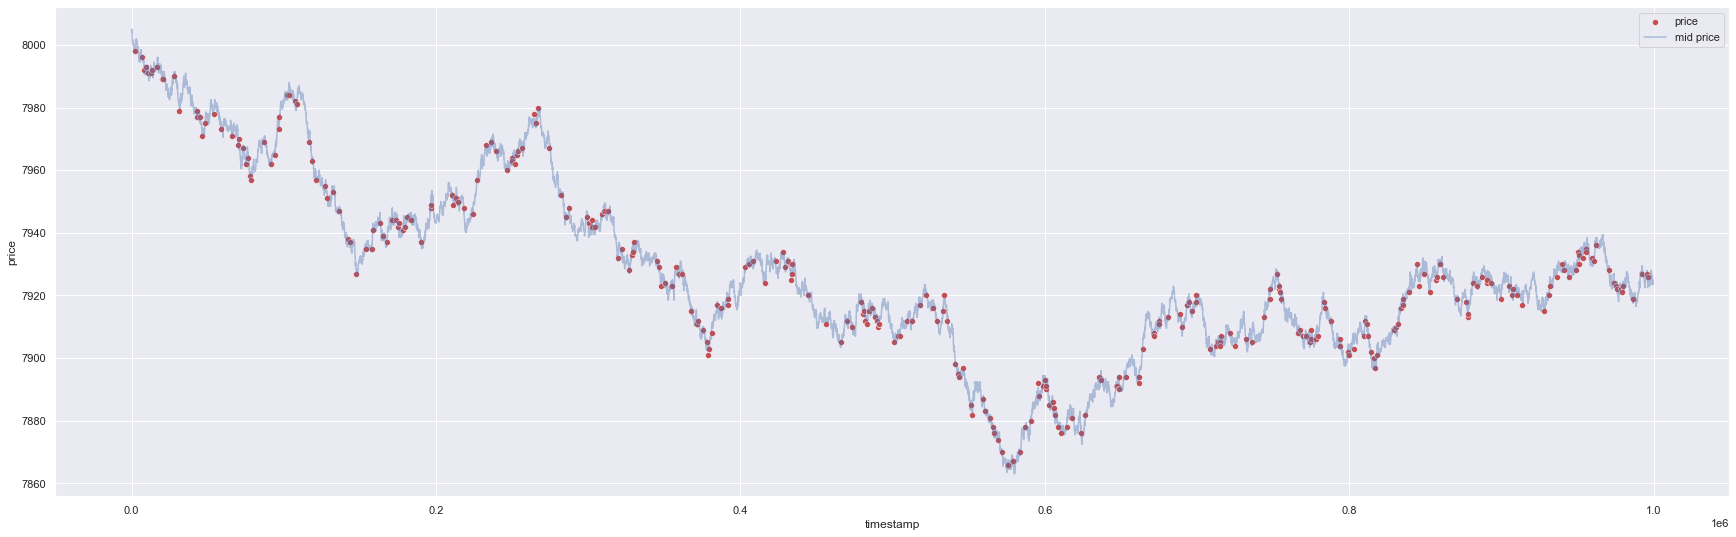

<AxesSubplot: >

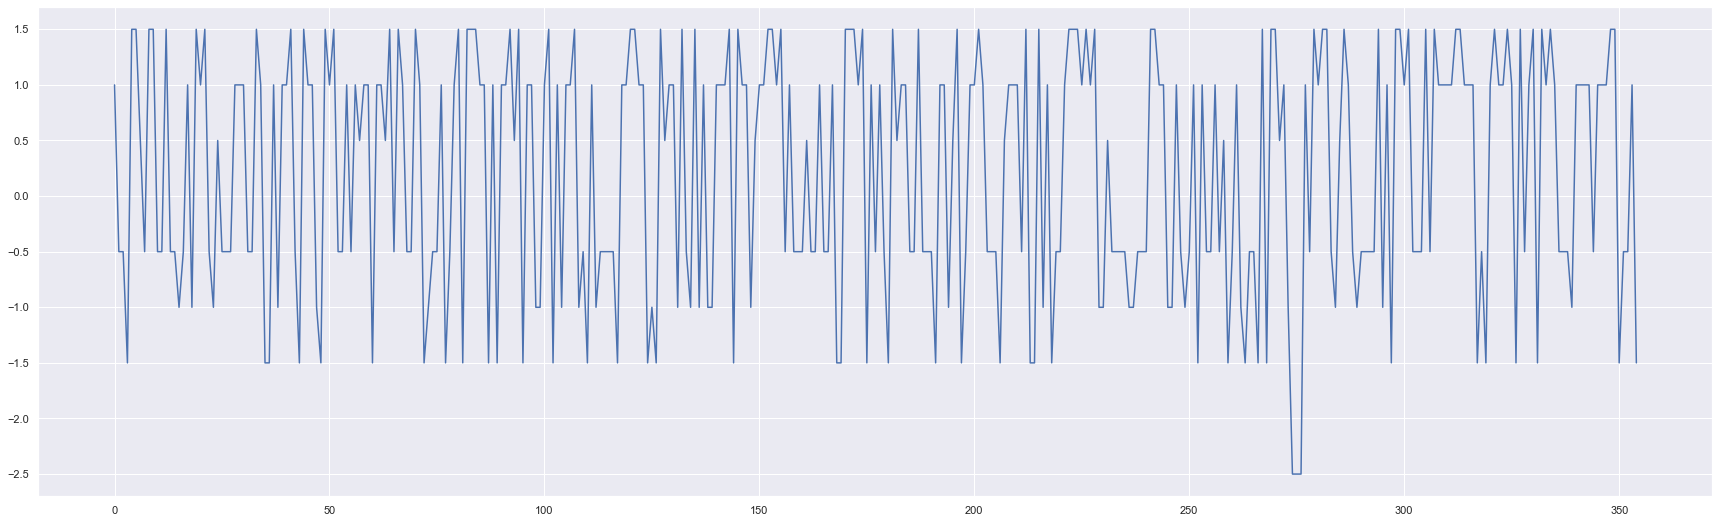

In [151]:
# coconut_market['price'].plot()
import seaborn as sns
sns.scatterplot(data=coconut_market,x='timestamp',y='price', label="price", color='r')
sns.lineplot(data=coconut,x='timestamp',y='mid_price',label='mid price', alpha=0.4)

distance = []
for i in coconut_market['timestamp'].to_numpy():
    distance.append(coconut[coconut['timestamp'] == i]['mid_price'].values[0]-coconut_market[coconut_market['timestamp']==i]['price'].values[0])
plt.show()
sns.lineplot(distance)

In [243]:
# Data analysis make market near mid price
def data_analysis(product_name):
    bias_avg = []
    std_avg = []
    distance = []
    best_bids = []
    best_asks = []
    for day in range(-1,2):
        path = f"island-data-bottle-round-2/prices_round_2_day_{day}.csv"
        path_nn = f"island-data-bottle-round-2/trades_round_2_day_{day}_nn.csv"

        df = pd.read_csv(path, sep=';')
        df_nn = pd.read_csv(path_nn, sep=';')

        product = df[df['product'] == product_name].reset_index(drop=True)
        product_market = df_nn[df_nn['symbol'] == product_name].reset_index(drop=True).fillna(0)

        # sns.scatterplot(data=coconut_market, x='timestamp',
        #                 y='price', label="price", color='r')
        # sns.lineplot(data=coconut, x='timestamp', y='mid_price',
        #          label='mid price', alpha=0.4)

        distance_temp = []
        for i in product_market['timestamp'].to_numpy():
            if product[product['timestamp'] == (i-100)]['mid_price'].values.size > 0:
                distance_temp.append(product_market[product_market['timestamp'] == i]['price'].values[0] - (
                    product[product['timestamp'] == (i-100)]['mid_price'].values[0] ))
                curr_product = product[product['timestamp']==i]
                best_bids.append(np.nanmax([
                    curr_product['bid_price_1'].values[0], 
                    curr_product['bid_price_2'].values[0], 
                    curr_product['bid_price_3'].values[0]]) - (
                    product[product['timestamp'] == (i-100)]['mid_price'].values[0] ))
                best_asks.append(np.nanmin([
                    curr_product['ask_price_1'].values[0],
                    curr_product['ask_price_2'].values[0],
                    curr_product['ask_price_3'].values[0]]) - (
                    product[product['timestamp'] == (i-100)]['mid_price'].values[0] ))
            
        # plt.show()
        # sns.lineplot(distance_temp)
        # plt.show()
        bias_avg.append(np.mean(distance_temp))
        std_avg.append(np.std(distance_temp))
        for i in distance_temp:
            distance.append(i)

    for i in range(3):
        print(f"bias_avg:{bias_avg[i]}")
        print(f"std_avg:{std_avg[i]}")

    print(np.mean(bias_avg))
    print(np.mean(std_avg))

    biased_avg = np.mean(bias_avg)

    bias_avg = []
    std_avg = []
    distance = []
    best_bids = []
    best_asks = []
    for day in range(-1, 2):
        path = f"island-data-bottle-round-2/prices_round_2_day_{day}.csv"
        path_nn = f"island-data-bottle-round-2/trades_round_2_day_{day}_nn.csv"

        df = pd.read_csv(path, sep=';')
        df_nn = pd.read_csv(path_nn, sep=';')

        product = df[df['product'] == product_name].reset_index(drop=True)
        product_market = df_nn[df_nn['symbol'] ==
                               product_name].reset_index(drop=True).fillna(0)

        # sns.scatterplot(data=coconut_market, x='timestamp',
        #                 y='price', label="price", color='r')
        # sns.lineplot(data=coconut, x='timestamp', y='mid_price',
        #          label='mid price', alpha=0.4)

        distance_temp = []
        for i in product_market['timestamp'].to_numpy():
            if product_name == 'PEARLS':
                if product[product['timestamp'] == (i-100)]['mid_price'].values.size > 0:
                    distance_temp.append(product_market[product_market['timestamp'] == i]['price'].values[0] - 10000)
                    curr_product = product[product['timestamp'] == i]
                    best_bids.append(np.nanmax([
                        curr_product['bid_price_1'].values[0],
                        curr_product['bid_price_2'].values[0],
                        curr_product['bid_price_3'].values[0]]) - 10000)
                    best_asks.append(np.nanmin([
                        curr_product['ask_price_1'].values[0],
                        curr_product['ask_price_2'].values[0],
                        curr_product['ask_price_3'].values[0]]) - 10000)

            elif product[product['timestamp'] == (i-100)]['mid_price'].values.size > 0:
                distance_temp.append(product_market[product_market['timestamp'] == i]['price'].values[0] - (
                    product[product['timestamp'] == (i-100)]['mid_price'].values[0] + biased_avg))
                curr_product = product[product['timestamp'] == i]
                best_bids.append(np.nanmax([
                    curr_product['bid_price_1'].values[0],
                    curr_product['bid_price_2'].values[0],
                    curr_product['bid_price_3'].values[0]]) - (
                    product[product['timestamp'] == (i-100)]['mid_price'].values[0] + biased_avg))
                best_asks.append(np.nanmin([
                    curr_product['ask_price_1'].values[0],
                    curr_product['ask_price_2'].values[0],
                    curr_product['ask_price_3'].values[0]]) - (
                    product[product['timestamp'] == (i-100)]['mid_price'].values[0] + biased_avg))

        # plt.show()
        # sns.lineplot(distance_temp)
        # plt.show()
        bias_avg.append(np.mean(distance_temp))
        std_avg.append(np.std(distance_temp))
        for i in distance_temp:
            distance.append(i)

    for i in range(3):
        print(f"bias_avg:{bias_avg[i]}")
        print(f"std_avg:{std_avg[i]}")

    print(np.mean(bias_avg))
    print(np.mean(std_avg))

    sns.displot(distance, kde=True).set(title="Market Price - Expected Price")
    plt.show()
    sns.displot(best_bids, kde=True).set(title="Best Bids")
    plt.show()
    sns.displot(best_asks, kde=True).set(title="Best Asks")
    plt.show()

    profit = []
    distance = np.array(distance)
    for s in np.arange(0, max(abs(distance)), 0.05):
        p_l = 0
        p_r = 0
        for i, d in enumerate(distance):
            if d > s and s < best_asks[i] and s < -best_bids[i]:
                p_r += 1
            if d < -s and s < best_asks[i] and s < -best_bids[i]:
                p_l += 1
        p = min(p_l,p_r)
        profit.append(p*2*s)
    plt.plot(profit)
    plt.title("Profit vs Spread/2")
    plt.show()

    print(f"Best Bias : {biased_avg}")
    print(f"Best Spread : {np.arange(0, 4, 0.05)[np.argmax(profit)]}")




In [ ]:
data_analysis("COCONUTS")

In [ ]:
data_analysis("BANANAS")

In [ ]:
data_analysis("PEARLS")

bias_avg:-0.4717314487632509
std_avg:2.430499557188098
bias_avg:-0.5051724137931034
std_avg:2.4956805729094462
bias_avg:-0.5711743772241993
std_avg:2.5320553538160087
-0.5160260799268511
2.486078494637851
bias_avg:0.04429463116429113
std_avg:2.430499557188098
bias_avg:0.010853666134438566
std_avg:2.4956805729094462
bias_avg:-0.055148297296657274
std_avg:2.5320553538160087
6.908062085327534e-13
2.486078494637851


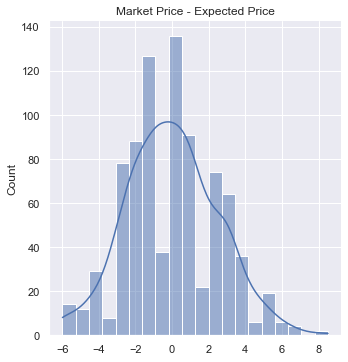

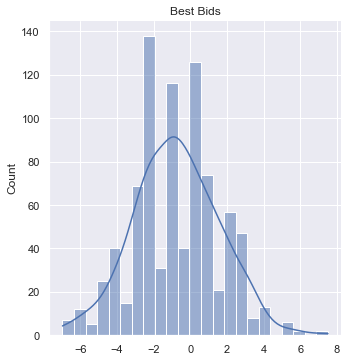

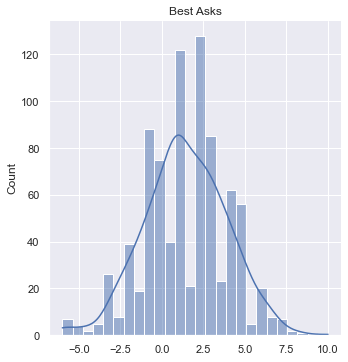

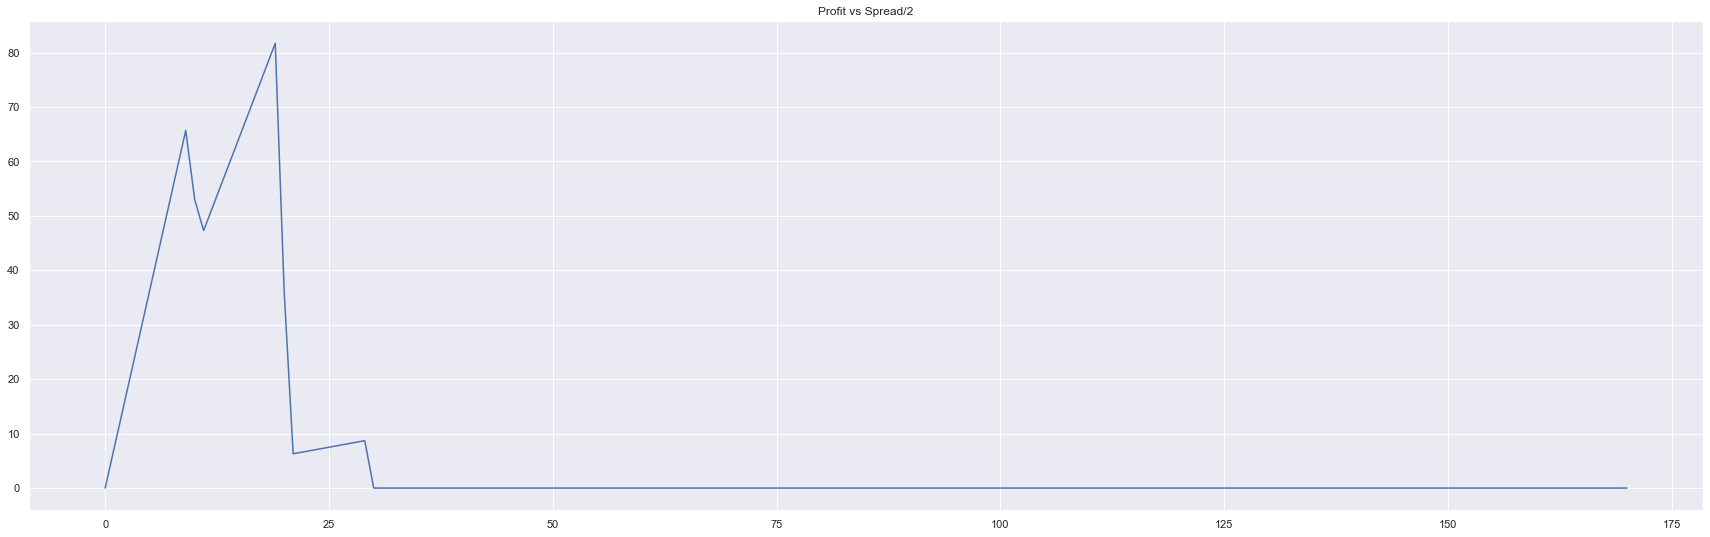

Best Bias : -0.5160260799268511
Best Spread : 0.9500000000000001


In [248]:
data_analysis("PINA_COLADAS")

3.8055879966176054

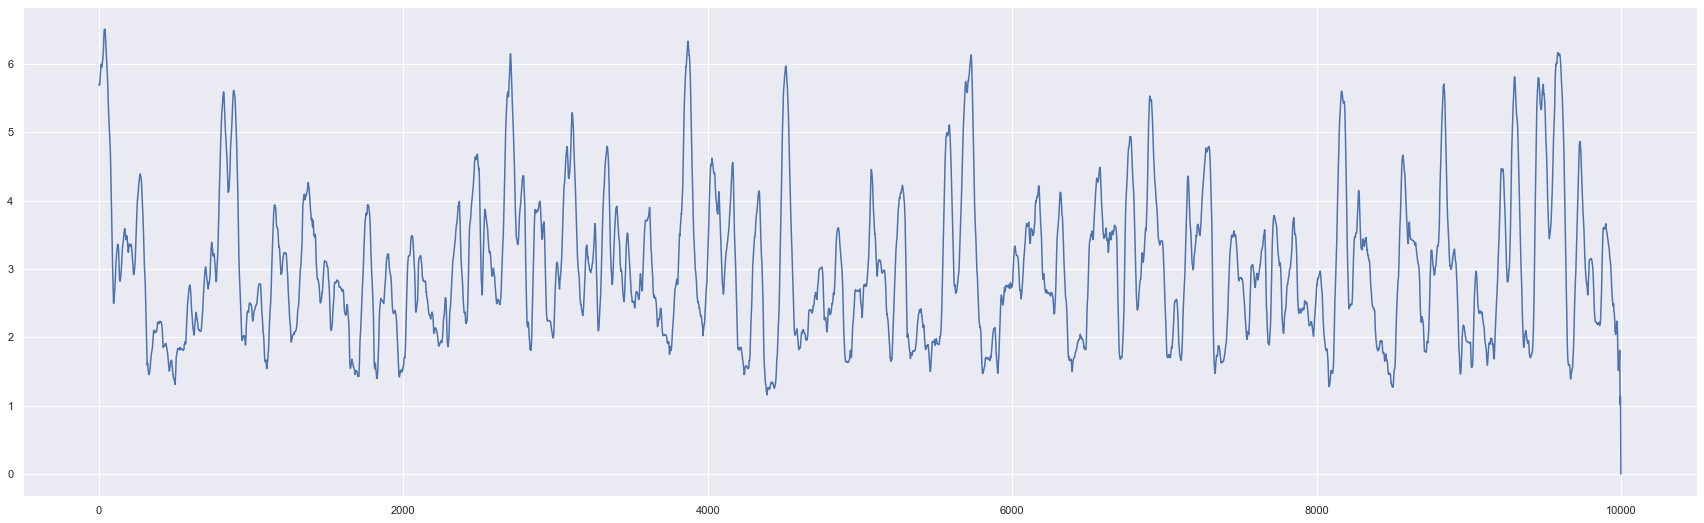

In [302]:
# np.std(coconut['mid_price'][2000:2100].to_numpy())
std = []
for i in range(len(coconut['mid_price']-100)):
    std.append(np.std(coconut['mid_price'][i:i+100]))
plt.plot(std)
std.sort()
std[math.floor(0.8*len(std))]


9.546596252068063

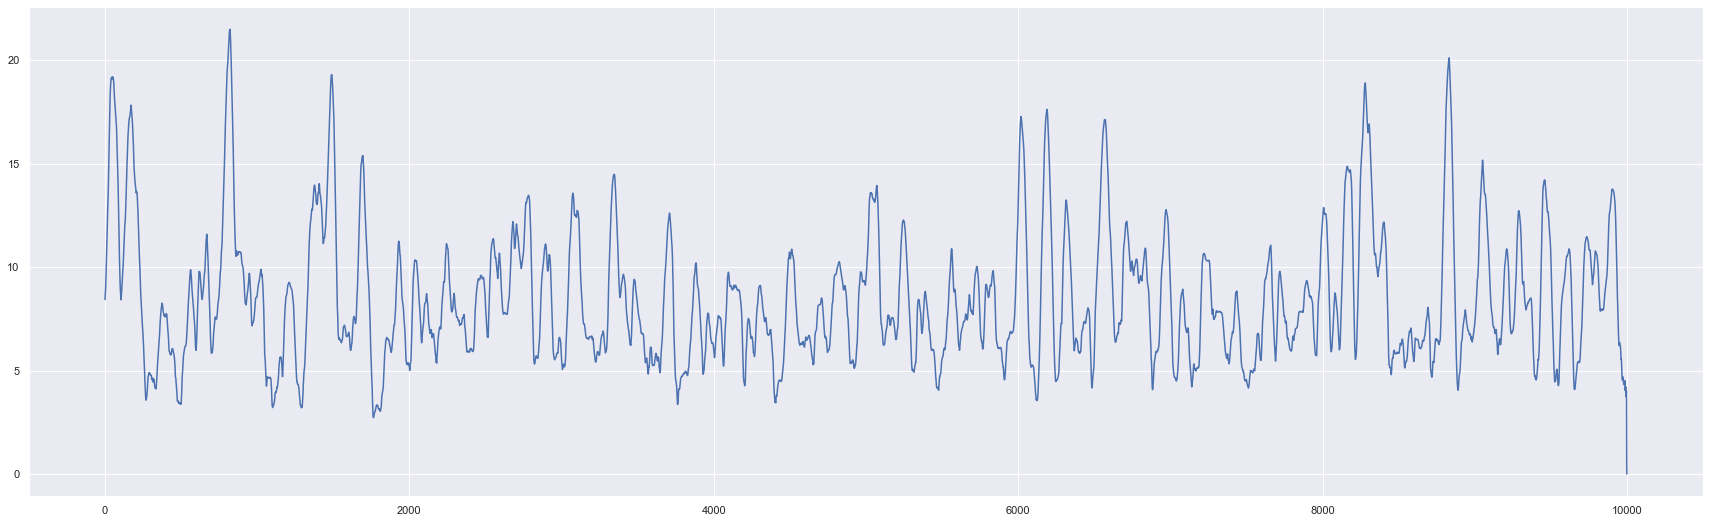

In [306]:
std = []
for i in range(len(pina_coladas['mid_price']-100)):
    std.append(np.std(pina_coladas['mid_price'][i:i+100]))
plt.plot(std)
std.sort()
std[math.floor(0.7*len(std))]
